# Task 1
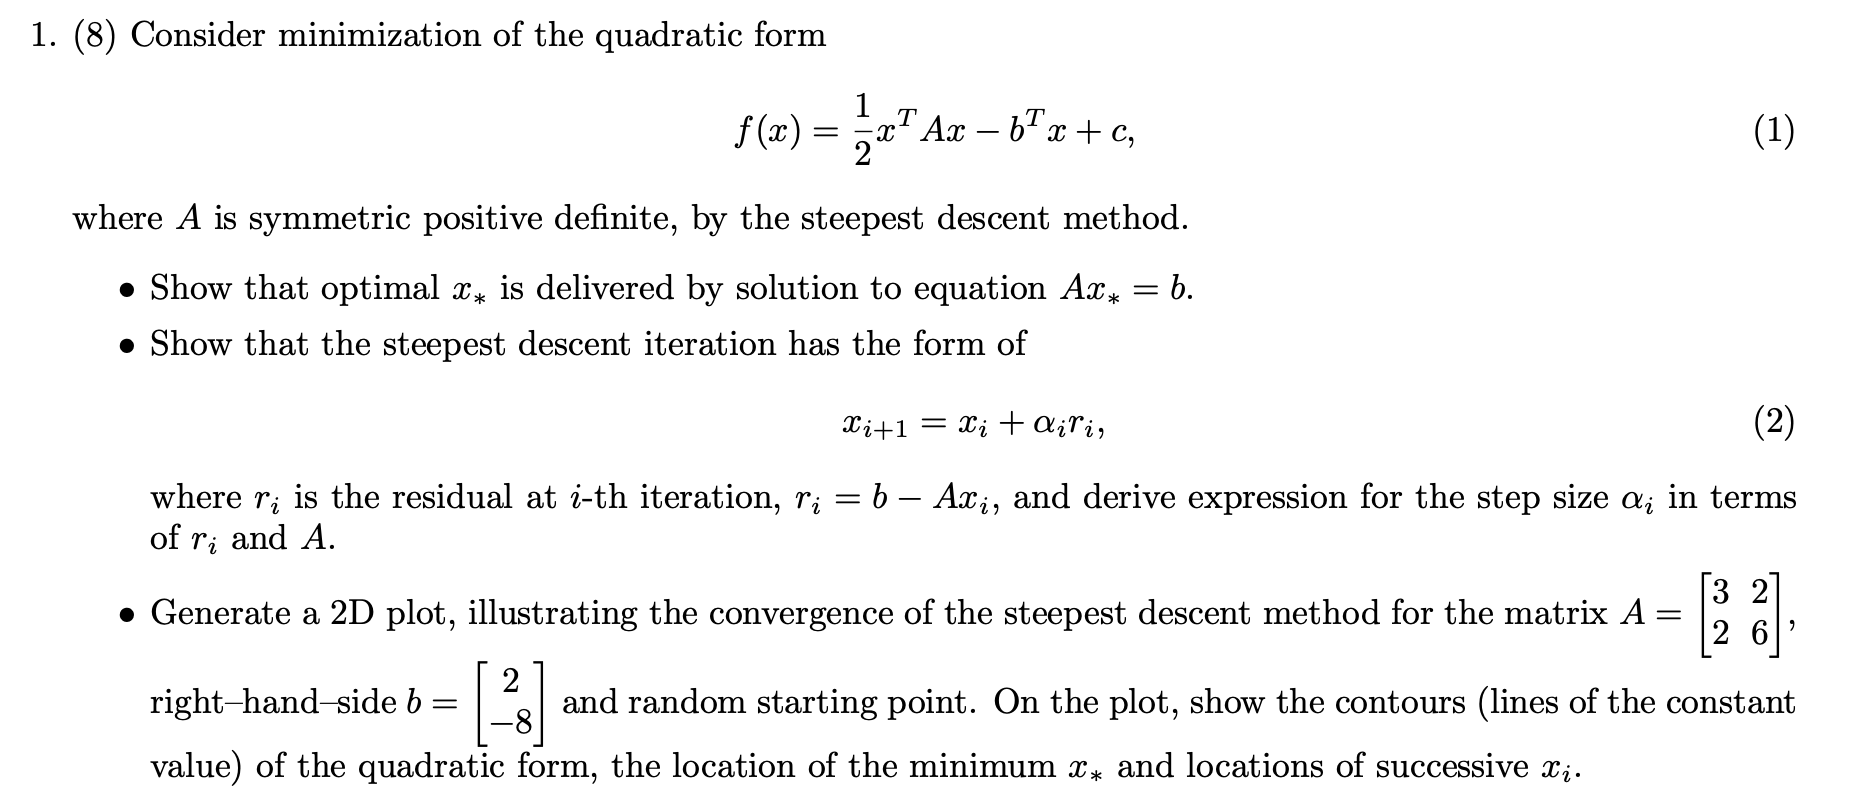

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def quadratic_form(x, A, b, c):
    return 0.5 * x.T@ A@x- b.T@x+ c

def gradient(A, b, x):
    return A@x - b

def steepest_descent(A, b, c, initial_guess, tolerance=1e-6, max_iterations=1000, step_size=0.01):
    x = initial_guess
    iteration = 0
    while iteration<  max_iterations:
        grad = gradient(A, b, x)
        if np.linalg.norm(grad) < tolerance:
            break

           
        
        
        
        x = x - step_size * grad
        iteration += 1

    return x


A = np.array([[3,2], [2,6]])
b = np.array([2,-8])
c = 0
initial_guess = np.random.rand(2)

opt_solution = steepest_descent(A, b, c, initial_guess)

#The gradient of the quadratic form with respect to x is: Ax-b.
#for the optimal solution, the gradient should be zero. Therefore, for the optimal solution we have Ax* = b.
verification_result = np.allclose(A @ opt_solution, b)

print("Res", opt_solution)
print("True?", verification_result)

Res [ 1.99999955 -1.99999978]
True? True


We should minimizes the quadratic form $f(x)=1/2 \cdot x^T Ax-b^T x + c$. The gradient of f(x) is given by Ax-b. At each iteration, the steepest descent method updates the solution $x_{i+1}= x_{i}-\alpha \nabla f(x_i)$ by moving in the direction of the negative gradient. Substitute: $x_{i+1}= x_{i}-\alpha \cdot (A x_i-b)$ ==> $x_{i+1}= x_{i}-\alpha A x_i+\alpha b$ ==> $x_{i+1}= x_{i}+\alpha(b- A x_i)$ ==> $r_i = b- A x_i$ and $\alpha = $

!!!
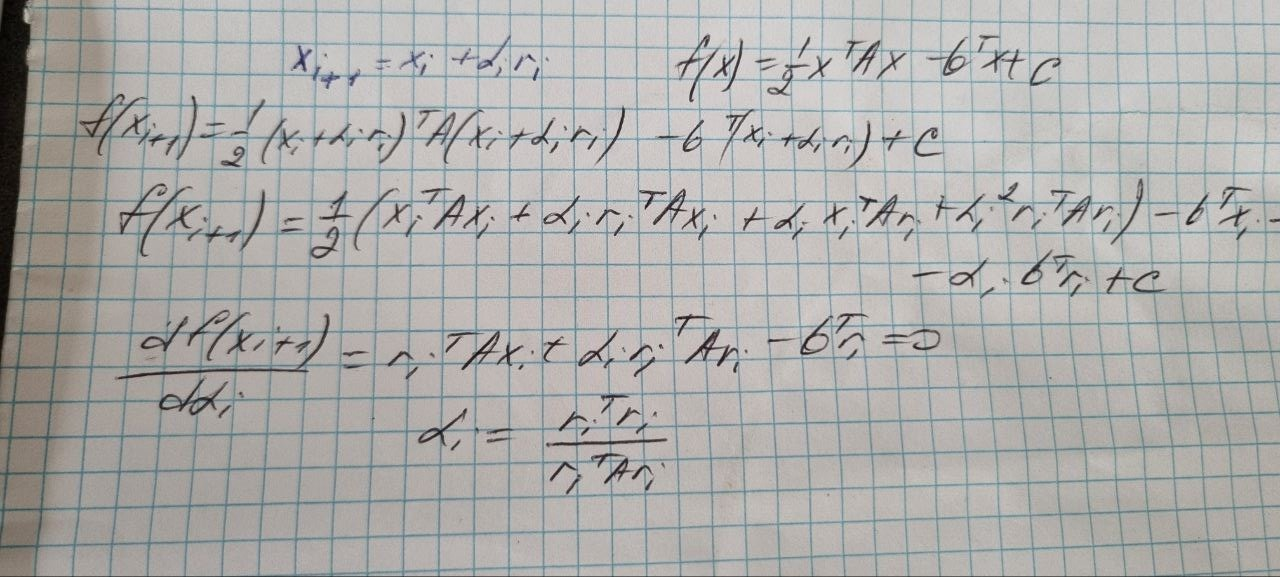

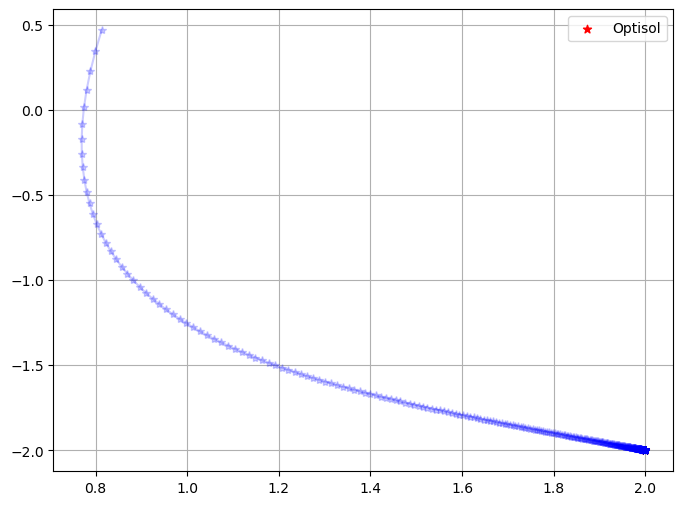

In [56]:
def steepest_descent(A, b, initial_guess, tolerance=1e-6, max_iterations=1000, step_size=0.01):
    x = initial_guess
    iteration = 0
    trajectory = [x]

    while iteration < max_iterations:
        grad = gradient(A, b, x)
        if np.linalg.norm(grad) < tolerance:
            break

        x = x - step_size * grad
        trajectory.append(x)
        iteration += 1

    return np.array(trajectory)

initial_guess = np.random.rand(2)
trajectory = steepest_descent(A, b, initial_guess)

plt.figure(figsize=(8, 6))
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='*', linestyle='-', color='b', alpha=0.2)
plt.scatter(*trajectory[-1], marker='*', color='red', label='Optisol')
plt.legend()
plt.grid(True)
plt.show()


# Task 2
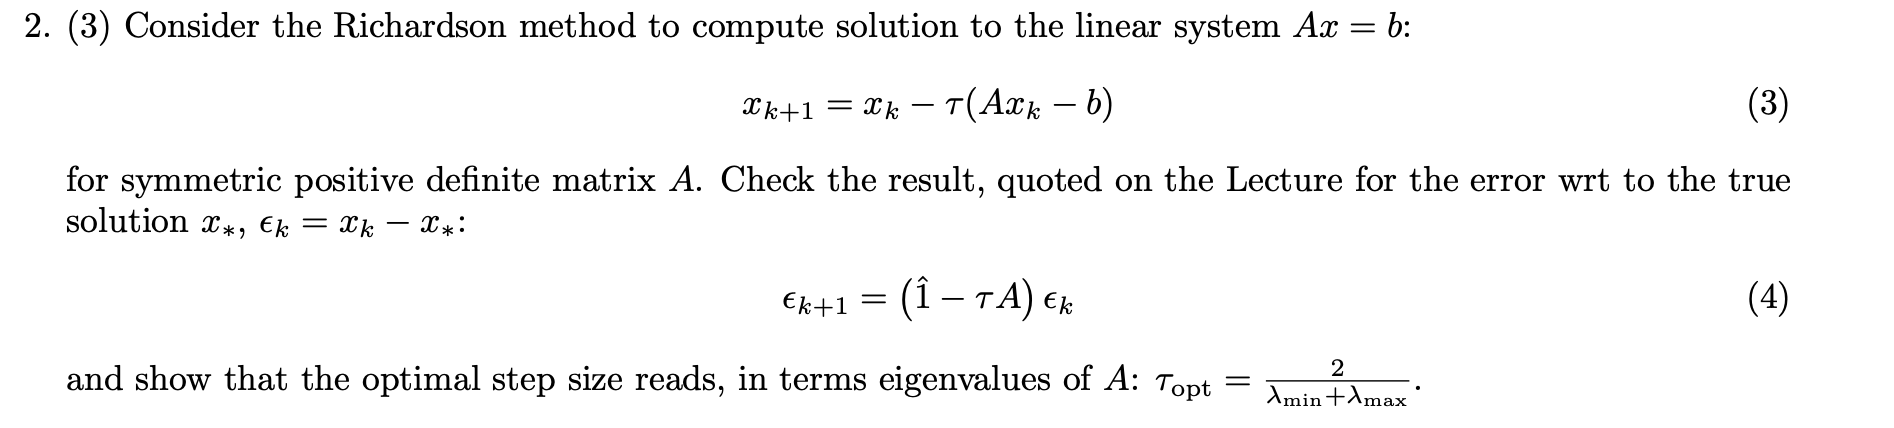

Optistep_size 0.2222222222222222
26 iterations


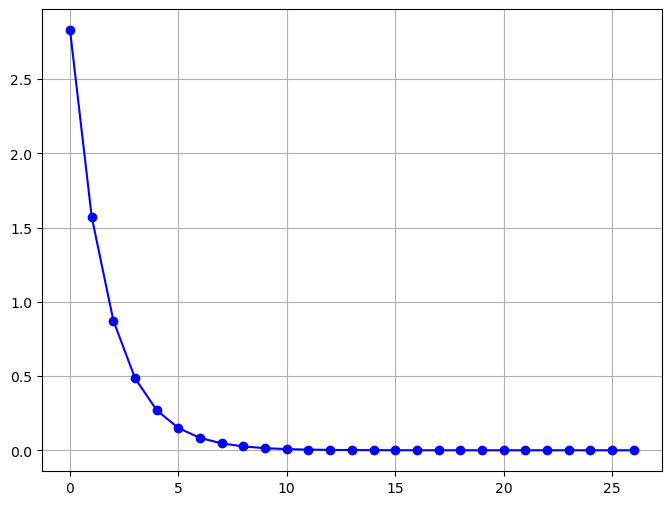

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def richardson_iteration(A, b, tau, initial_guess, true_solution, max_iterations=1000, tolerance=1e-6):
    x = initial_guess
    epsilon = x - true_solution
    epsilon_norms = [np.linalg.norm(epsilon)]

    for k in range(max_iterations):
        residual = A @ x - b
        x = x - tau * residual
        epsilon = x - true_solution
        epsilon_norm = np.linalg.norm(epsilon)
        epsilon_norms.append(epsilon_norm)

        if epsilon_norm < tolerance:
            print(k+1, "iterations")
            break
    return epsilon_norms

def compute_optimal_step_size(A):
    eigenvalues, _ = np.linalg.eig(A)
    lambda_min = np.min(eigenvalues)
    lambda_max = np.max(eigenvalues)
    tau_optimal = 2/(lambda_min + lambda_max)
    return tau_optimal

A = np.array([[3,2], [2, 6]])
tau_optimal = compute_optimal_step_size(A)
b = np.array([2, -8])
true_solution = np.linalg.solve(A, b)  #Solution for comparison
initial_guess = np.zeros_like(b)
#tau = 0.01
print("Optistep_size", tau_optimal)

epsilon_norms = richardson_iteration(A, b, tau_optimal, initial_guess, true_solution)

plt.figure(figsize=(8,6))
plt.plot(epsilon_norms, marker='o', linestyle='-', color='b')
plt.grid(True)
plt.show()


# Task 5 
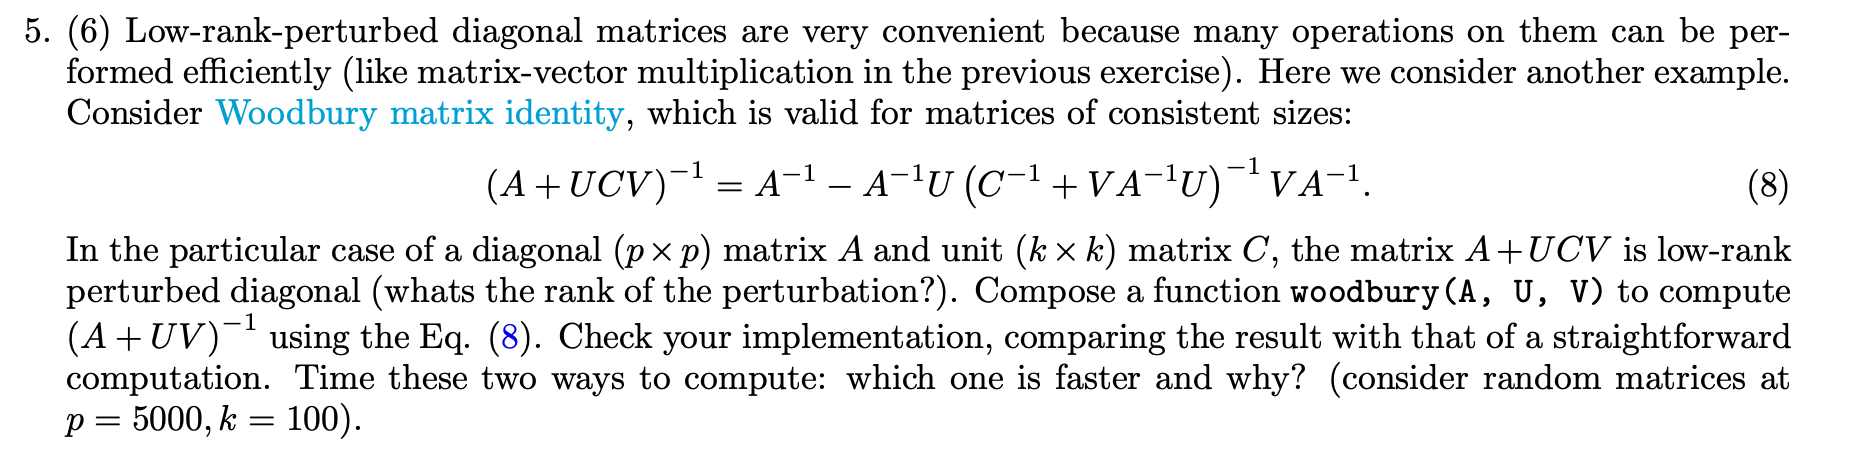

In [59]:
import timeit

def simple(A, U, V):
    return np.linalg.inv(A+U @ V)

def woodbury(A, U, V, fast=False):
    Ainv = np.diag(1 / np.diagonal(A)) if fast else np.linalg.inv(A)
    return Ainv - Ainv@U@np.linalg.inv(np.eye(V.shape[0]) + V @ Ainv@ U)   @ V@ Ainv

p = 5000
k = 100

A = np.diag(np.random.rand(p))
U = np.random.rand(p, k)
V = np.random.rand(k, p)

simple_time = timeit.timeit(lambda: simple(A, U, V), number=1)
print("Simple Function Execution Time:", simple_time)

woodbury_time = timeit.timeit(lambda: woodbury(A, U, V, True), number=1)
print("Woodbury Function Execution Time:", woodbury_time)

term_inside_inverse = np.eye(V.shape[0]) + V @ np.linalg.inv(A) @ U
perturbation_matrix = U@ np.linalg.inv(term_inside_inverse) @ V
rank_of_perturbation = np.linalg.matrix_rank(perturbation_matrix)
print("Rank of Perturbation Matrix:", rank_of_perturbation)

Simple Function Execution Time: 1.7825246249994962
Woodbury Function Execution Time: 1.3732530409997707
Rank of Perturbation Matrix: 100


It's worth noting that the efficiency gains from using the Woodbury identity are most pronounced when dealing with large matrices or in situations where the low-rank update is significantly smaller than the original matrix.

# Task 3
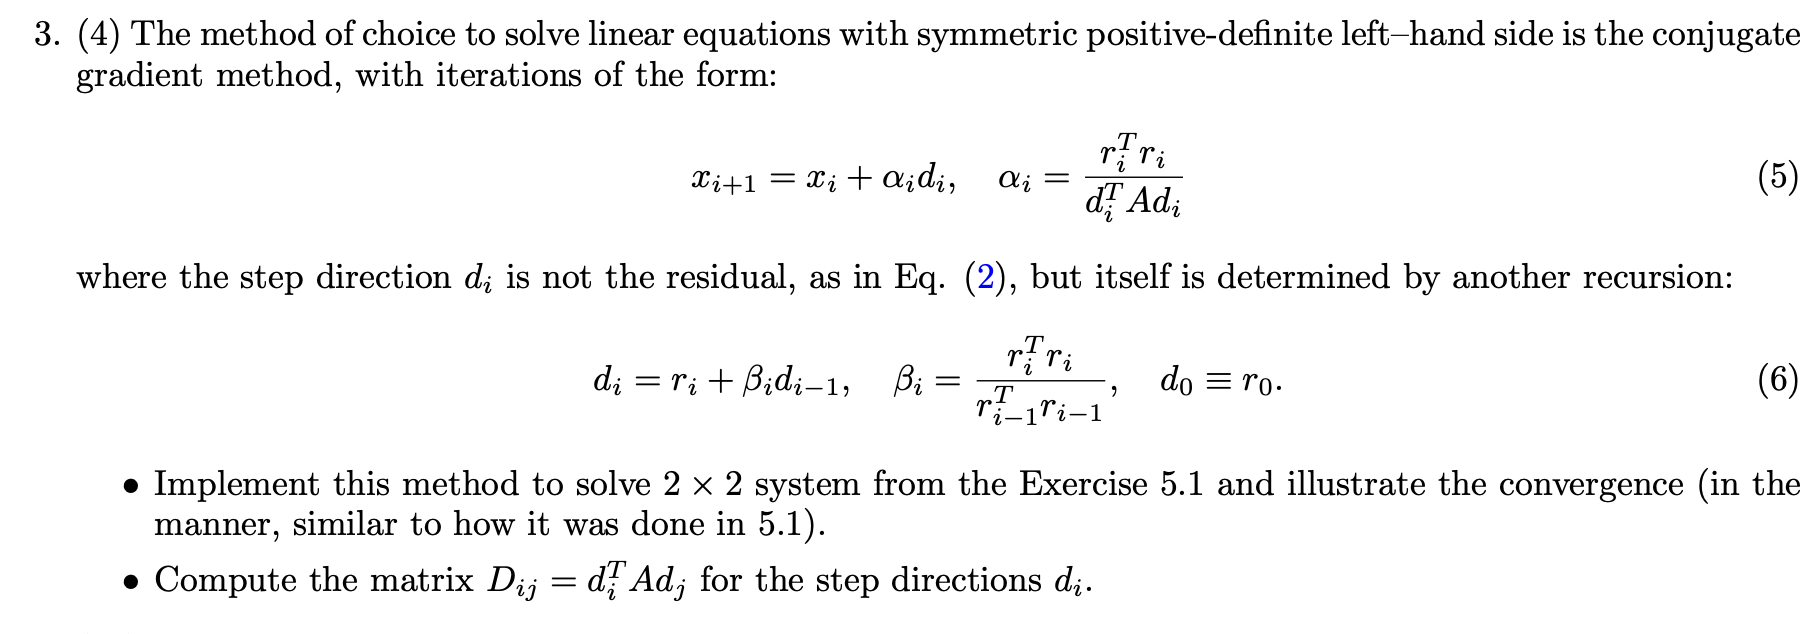

2


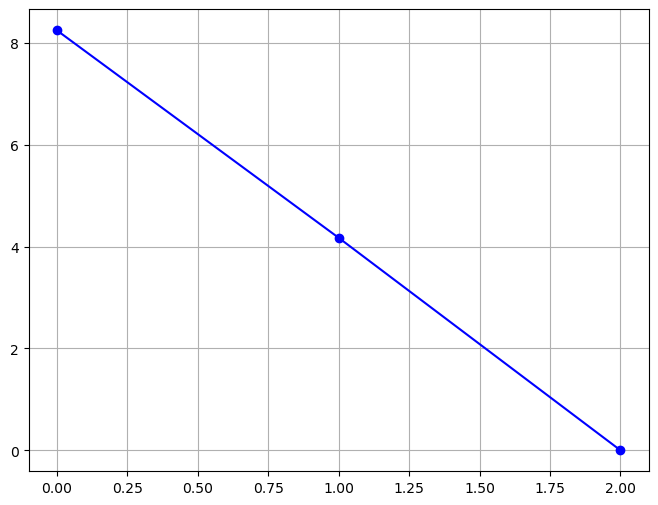

Optimal Solution: [ 2. -2.]
D_matrix: [[ 4.99286902e+01 -1.15987928e-14]
 [-1.15987928e-14  5.12759588e-30]]


In [60]:
import numpy as np
import matplotlib.pyplot as plt

all_directions = []

def conjugate_gradient(A, b, initial_guess=None, tolerance=1e-6, max_iterations=1000):
    n = len(b)
    
    if initial_guess is None:
        x = np.zeros_like(b)
    else:
        x = initial_guess

    r = b - A @ x
    d = r
    rs_old = r.T @ r

    convergence_history = [np.linalg.norm(r)]

    for i in range(max_iterations):
        Ad = A@d
        alpha =rs_old / (d.T @ Ad)
        x = x + alpha * d
        r = r -  alpha* Ad
        rs_new = r.T @ r

        beta = rs_new / rs_old
        d =    r+ beta * d
        all_directions.append(d)
        
        rs_old = rs_new
        
        convergence_history.append(np.linalg.norm(r))

        if np.linalg.norm(r) < tolerance:
            print(i+1)
            break

    return x, convergence_history

def compute_D_matrix(A, all_directions):
    n = len(all_directions)
    D_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            D_matrix[i, j] = all_directions[i].T @ A@ all_directions[j]

    return D_matrix

A = np.array([[3,2], [2,6]])
b = np.array([2,-8])
solution, convergence_history = conjugate_gradient(A, b)
D_matrix = compute_D_matrix(A, all_directions)

plt.figure(figsize=(8,6))
plt.plot(convergence_history, marker='o', linestyle='-', color='b')
plt.grid(True)
plt.show()

print("Optimal Solution:", solution)
print("D_matrix:", D_matrix)

# Task 4
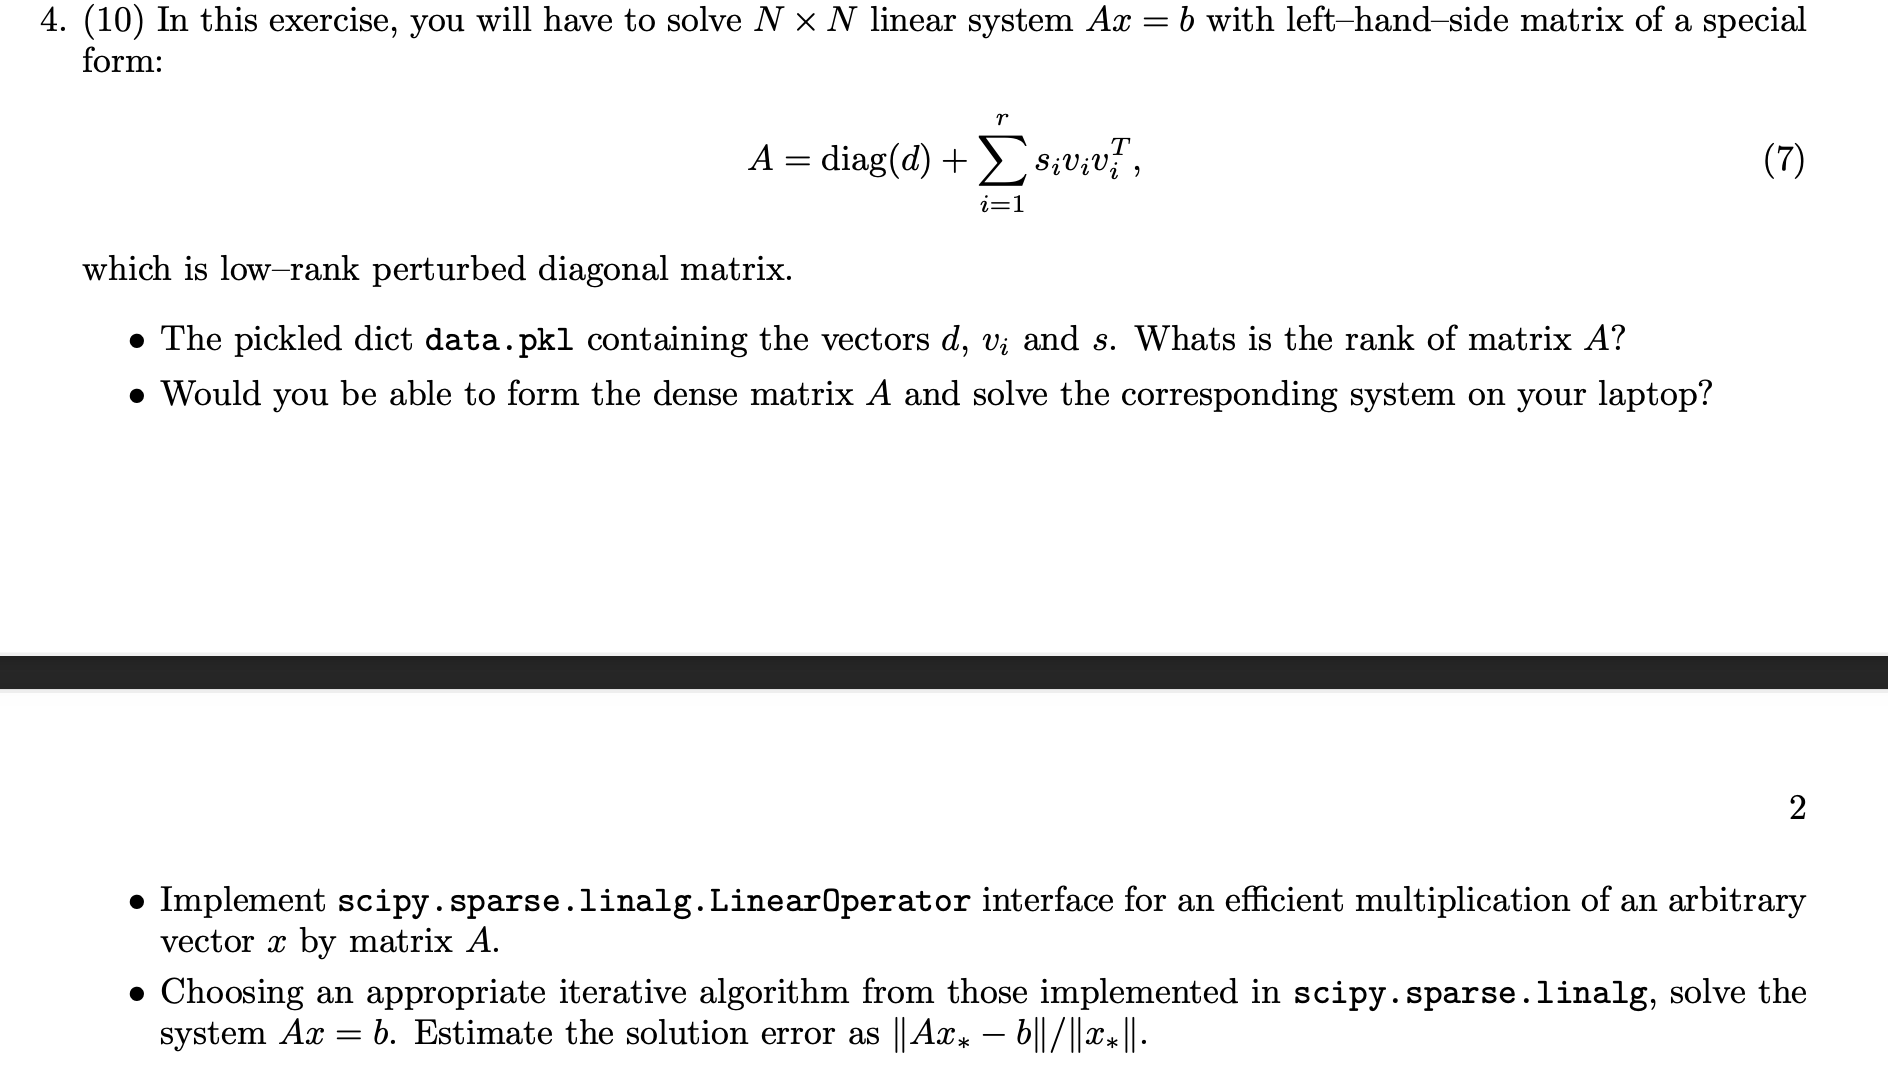

In [61]:
import scipy.sparse.linalg
import numpy as np

data = np.load("data.pkl", allow_pickle = True)

In [62]:

d = data['d']
s = data['s']
v = data['v']
b = data['b']


In [63]:
import scipy as sp
def Ax(x):
    n = d.shape[0]
    r = s.shape[0]

    ret = d * x
    for i in range(r):
        ret += s[i] * v[:,i] * np.dot(v[:, i], x)
    return ret

A_op = sp.sparse.linalg.LinearOperator((d.shape[0], d.shape[0]), Ax)
A_op @ d
rank_A = np.linalg.matrix_rank(A_op)
rank_A

1

In [64]:
class CustomLinearOperator(scipy.sparse.linalg.LinearOperator):
    def __init__(self, A_shape, d, s, v):
        self.d = d
        self.s = s
        self.v = v
        super().__init__(dtype=np.float64, shape=A_shape)

    def _matvec(self, x):
        n = self.d.shape[0]
        r = self.s.shape[0]
        
        ret = self.d * x
        for i in range(r):
            ret += self.s[i] * self.v[:, i] * np.dot(self.v[:, i], x)
        return ret

data = np.load("data.pkl", allow_pickle=True)
d = data['d']
s = data['s']
v = data['v']
A_shape = (len(d), len(d))

A_op = CustomLinearOperator(A_shape, d, s, v)
x = np.random.rand(len(d))
result = A_op @ x

In [ ]:
#solver = scipy.sparse.linalg.cg
#x_solution, info = solver(A_op, result)
#solution_error = np.linalg.norm(A_op @ x_solution - b) / np.linalg.norm(x_solution)

# Task 6 
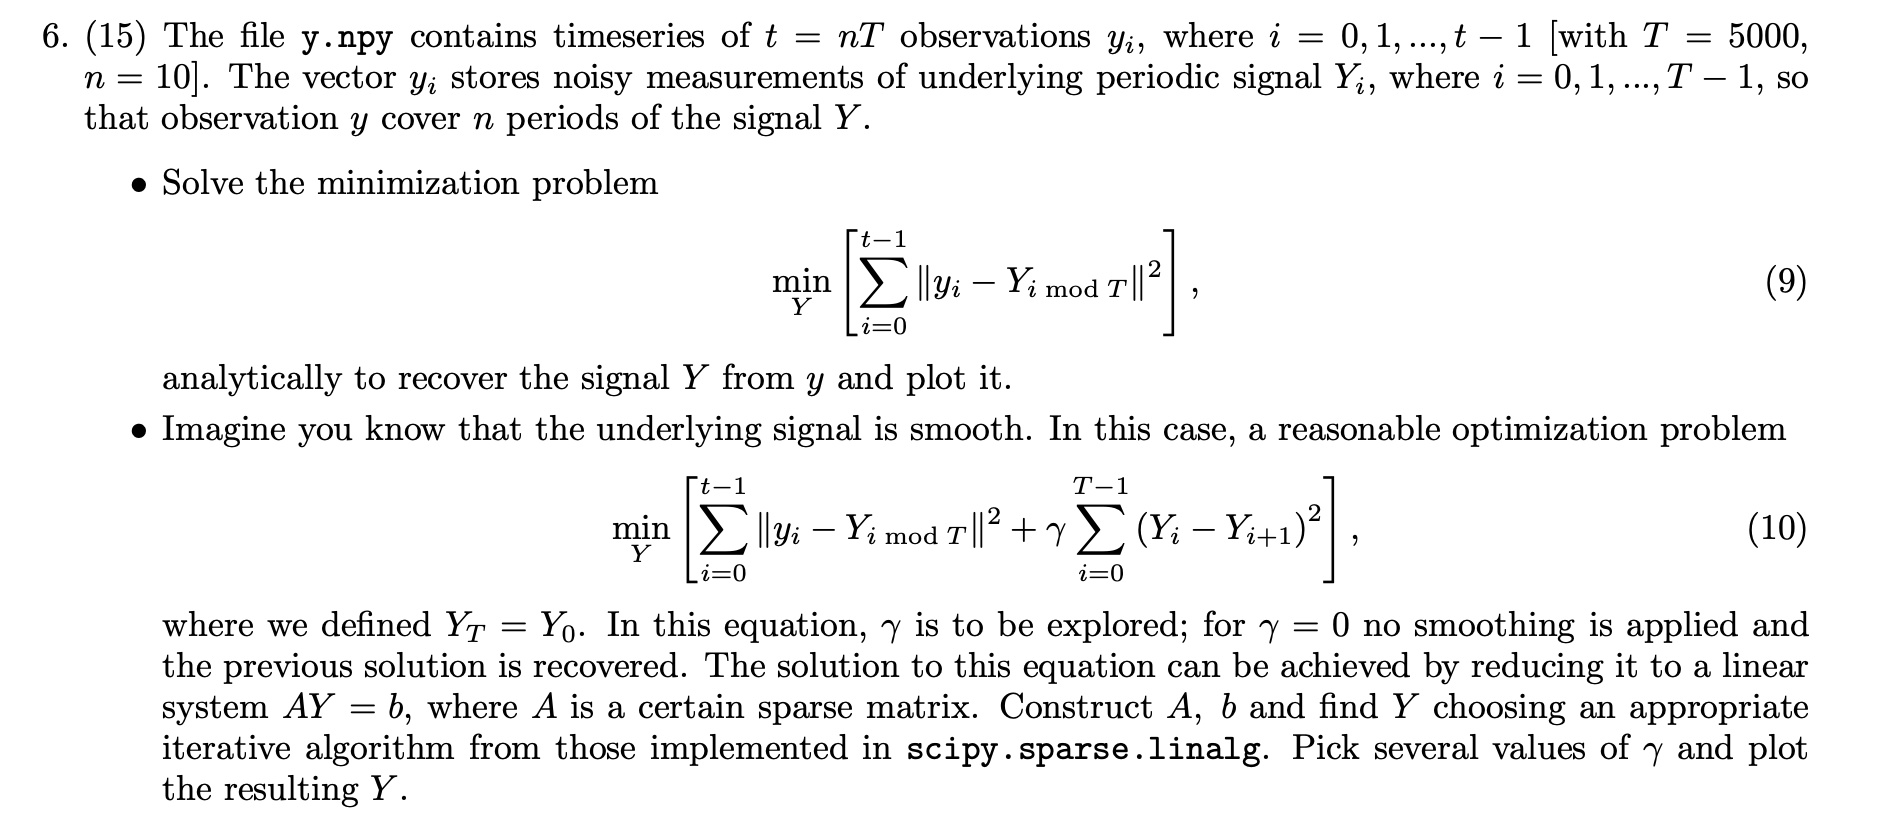

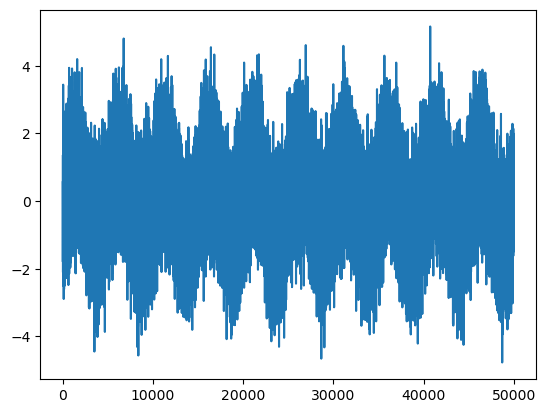

In [65]:
n = 10
T = 5000
y = np.load("y.npy")
y.shape
plt.plot(y)


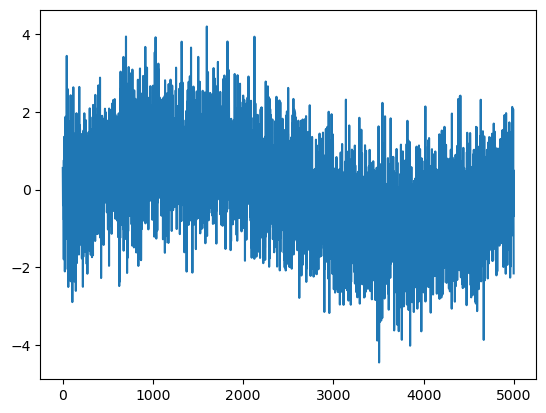

In [66]:
plt.plot(y[0:5000])

Analytically:
$$
r = \sum\limits_{i=0}^{t-1} \left( y_i - Y_{i\text{ mod }T} \right)^2
$$

$\min$ means $\frac{dr}{dY_j} = 0$:
$$
\frac{dr}{dY_j} = \sum\limits_{i, i\text{ mod }T = j} \frac{d}{dY_j}\left( y_i - Y_j \right)^2
= -2\sum\limits_{i,i\text{ mod }T = j} \left( y_i - Y_j \right) = -2 \left( \sum\limits_{i,i\text{ mod }T = j} y_i - nY_j \right) = 0
$$
$$
\sum\limits_{k=0}^{n-1} y_{kT + j} - nY_j = 0
$$

$$
Y_j = \frac{1}{n} \sum\limits_{k=0}^{n-1} y_{kT + j}
$$

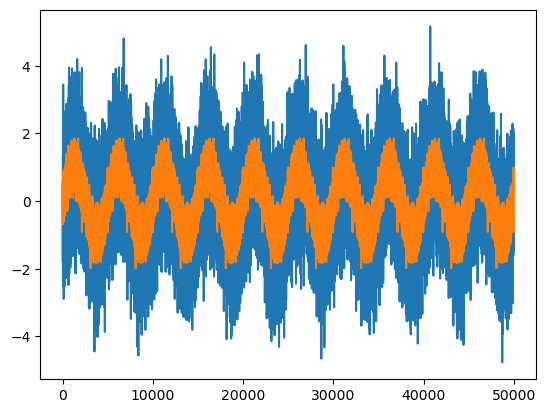

In [67]:
Y = np.array(
    [ np.array( [ y[k * T + j] for k in range(n) ] ).mean() for j in range(T) ]
)
plt.plot(y)
plt.plot(np.tile(Y, n))

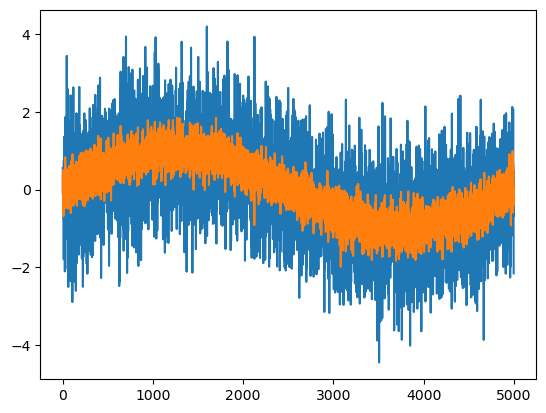

In [68]:
plt.plot(y[:T])
plt.plot(Y)

$$
\min\limits_Y \left[ \sum\limits_{i=0}^{t-1} \|y_i - Y_{i\text{ mod  }T}\|^2 + \gamma \sum\limits_{i=0}^{T-1} \left(Y_i - Y_{i+1}\right)^2\right]
$$

# Task 7


$$
p_i = \sum\limits_j \frac{p_j}{L\left(j\right)} l_{ij}
$$
$$
G_{ij} = \frac{l_{ij}}{L\left(j\right)}
$$

System
$$
\left( \hat 1 - \beta G\right) \vec p = \frac{1 - \beta}{n} \vec e
$$

$$\beta = 0.8$$
$$\sum\limits_i p_i = 1$$

In [6]:
import numpy as np
pages = {
    "animals": [ "bite", "dogs", "cats" ],
    "bite": [ "animals", "dogs" ],
    "orangecatvideos": [ "cats" ],
    "wolfs": [ "animals", "bite", "dogs" ],
    "dogs": [ "animals", "bite", "wolfs", "puppy", "golden_retreiver" ],
    "cats": [ "animals", "bite" ],
    "puppy": [ "dogs" ],
    "golden_retreiver": [ "dogs" ],
    "hl2_dog": [ "dogs" ],
    "videogame_companions": [ "hl2_dog" ]
}
for key in pages:
    for ref in pages[key]:
        assert(ref in pages.keys())
len(pages)

10

In [7]:
index = dict(enumerate(pages.keys()))
index

{0: 'animals',
 1: 'bite',
 2: 'orangecatvideos',
 3: 'wolfs',
 4: 'dogs',
 5: 'cats',
 6: 'puppy',
 7: 'golden_retreiver',
 8: 'hl2_dog',
 9: 'videogame_companions'}

In [8]:
l =  np.array(
    [
        [
            index[i] in pages[index[j]] for j in range(10)
        ] for i in range(10)
    ]
)

l

array([[False,  True, False,  True,  True,  True, False, False, False,
        False],
       [ True, False, False,  True,  True,  True, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False,  True, False, False, False, False,
        False],
       [ True,  True, False,  True, False, False,  True,  True,  True,
        False],
       [ True, False,  True, False, False, False, False, False, False,
        False],
       [False, False, False, False,  True, False, False, False, False,
        False],
       [False, False, False, False,  True, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
         True],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [9]:
G = np.zeros((10, 10))
G

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [10]:
for i in range(10):
    for j in range(10):
        if index[i] in pages[index[j]]:
            G[i][j] = 1 / len(pages[index[j]])
G

array([[0.        , 0.5       , 0.        , 0.33333333, 0.2       ,
        0.5       , 0.        , 0.        , 0.        , 0.        ],
       [0.33333333, 0.        , 0.        , 0.33333333, 0.2       ,
        0.5       , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.2       ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.33333333, 0.5       , 0.        , 0.33333333, 0.        ,
        0.        , 1.        , 1.        , 1.        , 0.        ],
       [0.33333333, 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.2       ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [11]:
for i in range(10):
    if G[:,i].max() == 0:
        G[:,i] = 1 / 10
G

array([[0.        , 0.5       , 0.        , 0.33333333, 0.2       ,
        0.5       , 0.        , 0.        , 0.        , 0.        ],
       [0.33333333, 0.        , 0.        , 0.33333333, 0.2       ,
        0.5       , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.2       ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.33333333, 0.5       , 0.        , 0.33333333, 0.        ,
        0.        , 1.        , 1.        , 1.        , 0.        ],
       [0.33333333, 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.2       ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [12]:
beta = 0.8
A = np.eye(10) - beta * G
A

array([[ 1.        , -0.4       ,  0.        , -0.26666667, -0.16      ,
        -0.4       ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.26666667,  1.        ,  0.        , -0.26666667, -0.16      ,
        -0.4       ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        , -0.16      ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.26666667, -0.4       ,  0.        , -0.26666667,  1.        ,
         0.        , -0.8       , -0.8       , -0.8       ,  0.        ],
       [-0.26666667,  0.        , -0.8       ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.16      ,
         0.        ,  1.        ,  0.        

In [13]:
b = (1 - beta) / 10 * np.ones(10)
p = np.linalg.solve(A, b)
{ index[i]: p[i] for i in index }

{'animals': 0.18475060562767878,
 'bite': 0.16715530985361415,
 'orangecatvideos': 0.019999999999999997,
 'wolfs': 0.06614348717311636,
 'dogs': 0.2883967948319772,
 'cats': 0.08526682816738101,
 'puppy': 0.06614348717311636,
 'golden_retreiver': 0.06614348717311634,
 'hl2_dog': 0.036,
 'videogame_companions': 0.019999999999999997}

In [18]:
num_nodes = 10
l = np.random.randint(2, size=(num_nodes, num_nodes)) 
print(l)
L = np.sum(l, axis=1) 
G = np.zeros_like(l, dtype=float)
for i in range(num_nodes):
    for j in range(num_nodes):
        if L[j] != 0:
            G[i, j] = l[i, j] / L[j]
            
print(G)

[[0 0 0 1 1 1 1 0 0 1]
 [1 1 0 0 0 0 1 1 1 1]
 [1 1 0 1 0 1 1 1 1 1]
 [1 0 1 0 1 0 0 1 1 1]
 [0 0 1 1 0 0 0 1 0 1]
 [1 1 0 1 0 0 1 0 1 0]
 [1 0 1 0 0 1 0 1 0 1]
 [1 1 1 1 0 1 0 1 0 0]
 [1 1 1 1 0 1 1 1 1 1]
 [0 0 0 1 0 1 1 1 1 1]]
[[0.         0.         0.         0.16666667 0.25       0.2
  0.2        0.         0.         0.16666667]
 [0.2        0.16666667 0.         0.         0.         0.
  0.2        0.16666667 0.11111111 0.16666667]
 [0.2        0.16666667 0.         0.16666667 0.         0.2
  0.2        0.16666667 0.11111111 0.16666667]
 [0.2        0.         0.125      0.         0.25       0.
  0.         0.16666667 0.11111111 0.16666667]
 [0.         0.         0.125      0.16666667 0.         0.
  0.         0.16666667 0.         0.16666667]
 [0.2        0.16666667 0.         0.16666667 0.         0.
  0.2        0.         0.11111111 0.        ]
 [0.2        0.         0.125      0.         0.         0.2
  0.         0.16666667 0.         0.16666667]
 [0.2        0.16

In [19]:
beta = 0.8
e = np.ones(num_nodes)
A = np.eye(10) - beta * G
b = (1 - beta) / 10 * np.ones(10)
p = np.linalg.solve(A, b)
print("PageRank:", p)

PageRank: [0.09051974 0.10244598 0.13029983 0.10237025 0.07399669 0.08877801
 0.08903496 0.10272283 0.14332981 0.10215721]


In [28]:
!axel https://snap.stanford.edu/data/p2p-Gnutella09.txt.gz
!ls

zsh:1: command not found: axel
2023-10-28.ipynb
2023-11-11.ipynb
2023-11-25.ipynb
2023-12-09.ipynb
Eugene_E_Tyrtyshnikov_auth_A_Brief_Introduction_to_Numerical_Analysis.pdf
HW4.ipynb
HW4.pdf
HW5Stat.html
HW5Stat.pdf
HW5_n.ipynb
Lecture 1
Lecture 2
Lecture 3
Lecture 4
Lecture 5
Lloyd_N_Trefethen,_David_Bau_III_Numerical_Linear_Algebra_Society.djvu
Untitled.ipynb
Untitled1.ipynb
data.pkl
p2p-Gnutella09.txt
y.npy


In [29]:
!gzip -df p2p-Gnutella09.txt.gz && ls

gzip: can't stat: p2p-Gnutella09.txt.gz (p2p-Gnutella09.txt.gz.gz): No such file or directory


In [30]:
!cat p2p-Gnutella09.txt

In [42]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg

data = {}
with open("p2p-Gnutella09.txt") as gnutella:
    for line in gnutella.readlines():
        if line[0] == '#': continue
        f, t = line.replace('\n', '').split('\t')
        f = int(f)
        t = int(t)
        if f not in data.keys(): data[f] = [ t ]
        else: data[f].append(t)
data

{0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 3: [540, 581, 1009, 1356, 1544, 2044, 2045, 2046, 2047, 2048],
 7: [671, 1063, 1159, 1562, 1572, 2004, 2034, 2035, 2036, 2037],
 9: [92, 95, 96, 350, 530, 703, 751, 822, 823, 837],
 10: [237, 430, 1164, 1574, 2038, 2039, 2040, 2041, 2042, 2043],
 11: [4, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 14: [1373, 2049, 2050, 2051, 2052],
 15: [177, 2355, 2356],
 19: [347, 589, 1459, 1557, 1571, 2060, 2061, 2062, 2063, 2064],
 20: [90, 356, 531, 703, 1436, 1909, 1910, 1911, 1912, 1913],
 21: [22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
 25: [90, 95, 534, 752, 824, 1237, 1643, 2091, 2092, 2093],
 28: [90, 531, 564, 707, 837, 1042, 1073, 1309, 1365, 1656],
 31: [270, 1765, 1975, 2053, 2054, 2055, 2056, 2057, 2058, 2059],
 32: [33, 34, 35, 36, 37, 38, 39, 40, 41, 42],
 39: [510, 1169, 1446, 2094, 2095, 2096, 2097, 2098, 2099, 2100],
 40: [1447, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073],
 43: [44, 45, 46, 47, 48, 49, 50, 51, 52, 53],
 46: [1029, 1625, 172

In [43]:
len(data)

3055

In [49]:
num_nodes = max(max(data.keys()), max([item for sublist in data.values() for item in sublist])) + 1

rows, cols = [], []
for node, neighbors in data.items():
    for neighbor in neighbors:
        rows.append(node)
        cols.append(neighbor)

G = sp.csr_matrix((np.ones(len(rows)), (rows, cols)), shape=(num_nodes, num_nodes))

for i in range(num_nodes):
    if G[:,i].max() == 0:
        G[:,i] = 1 / num_nodes

beta = 0.8
e = np.ones(num_nodes)
A = sp.eye(num_nodes) - beta * G 
b = (1 - beta)/num_nodes * np.ones(num_nodes)

p_sparse = sp.linalg.spsolve(A, b)
print("PageRank", p_sparse)


PageRank [-3.08506613e-03  2.45490883e-05  2.45490883e-05 ... -3.48661092e-04
  2.45490883e-05  2.45490883e-05]


In [50]:
norm = p_sparse / np.sum(p_sparse)
print(norm)

[-1.06919583e-02  8.50801304e-05  8.50801304e-05 ... -1.20835979e-03
  8.50801304e-05  8.50801304e-05]
